<a href="https://colab.research.google.com/github/karaage0703/karaage-ai-book/blob/master/ch02/02_karaage_ai_book_image_filter_zebbra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# シマウマで理解する画像フィルタの基礎

画像フィルタを、実際にコードを動かして、シマウマ画像の画像処理によって理解するサンプルです。

## サンプル画像のダウンロードと表示
以下でサンプルのシマウマ画像をダウンロードします

In [ ]:
!wget https://raw.githubusercontent.com/karaage0703/raspi-magazine-ai-2020/master/zebra.jpg

--2019-12-05 12:55:17--  https://raw.githubusercontent.com/karaage0703/raspi-magazine-ai-2020/master/zebra.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253972 (248K) [image/jpeg]
Saving to: ‘zebra.jpg’

zebra.jpg           100%[===================>] 248.02K  --.-KB/s    in 0.03s   

2019-12-05 12:55:17 (8.15 MB/s) - ‘zebra.jpg’ saved [253972/253972]



確認してみましょう

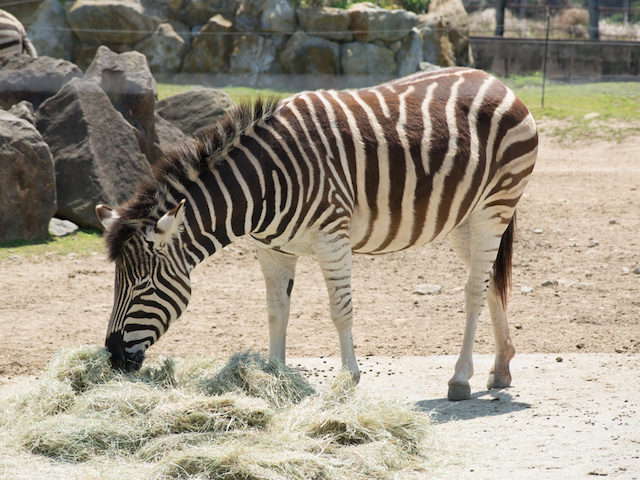

In [ ]:
from IPython.display import Image,display_jpeg
display_jpeg(Image('zebra.jpg'))

見事なしまうまですね

## フィルター処理

ここでは、理解を深めるために、あえてOpenCVなどの高度なライブラリを使わず、Numpyを使った配列計算によるフィルター処理を手を動かしながら行い理解を深めます。

画像フィルタ・畳み込みに関しては、以下記事参照下さい

https://karaage.hatenadiary.jp/entry/2017/07/31/073000

まずは、NumpyとPillowをインポートします。Pillowは、Jpeg画像の読み込みにのみ使っています。

In [ ]:
from PIL import Image
import numpy as np

自分だけみるフィルタ、つまり何もしないフィルタを設定します

In [ ]:
filter = [0, 0, 0,
         0, 1, 0,
         0, 0, 0]

フィルタの関数です。理解しやすさを最優先してかいており、高速化の工夫を何もしていないコードであること、ご了承下さい。

In [ ]:
def filter_processing(src):
    width, height = src.size
    dst = Image.new('RGB', (width, height))

    img_pixels = np.array([[src.getpixel((x,y)) for y in range(height)] for x in range(width)])
    color = np.zeros((len(filter), 3))

    for y in range(1, height-1):
        for x in range(1, width-1):
            color[0] = img_pixels[x-1][y-1]
            color[1] = img_pixels[x][y-1]
            color[2] = img_pixels[x+1][y-1]
            color[3] = img_pixels[x-1][y]
            color[4] = img_pixels[x][y]
            color[5] = img_pixels[x+1][y]
            color[6] = img_pixels[x-1][y+1]
            color[7] = img_pixels[x][y+1]
            color[8] = img_pixels[x+1][y+1]

            sum_color = np.zeros(3)
            for num in range(len(filter)):
                sum_color += color[num] * filter[num]

            r,g,b = map(int, (sum_color))
            r = min([r, 255])
            r = max([r, 0])
            g = min([g, 255])
            g = max([g, 0])
            b = min([b, 255])
            b = max([b, 0])

            dst.putpixel((x,y), (r,g,b))

    return dst

フィルタ計算します。高速化せずに、1ピクセル毎に計算繰り返しているので非常に遅いです。

入力した画像と全く同じシマウマが出てくると思います。何もしないフィルタなので当然ですね。

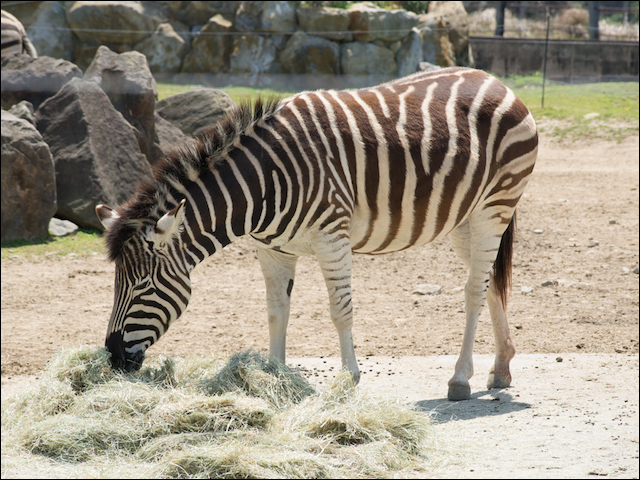

In [ ]:
filter_processing(Image.open('zebra.jpg'))

次に、以下のような左右に逆の重みづけがされているので、左右の明暗差が激しい縦シマのような模様が強調されるフィルタ（ソーベルフィルタ）を設定します。

In [ ]:
filter = [1, 0, -1,
         2, 0, -2,
         1, 0, -1]

同じように、フィルタ処理をしてみましょう。シマウマの縦シマが強調されていることがわかります。

おめでとうございます。これであなたも立派に特徴量を抽出する画像フィルタの設計ができました。

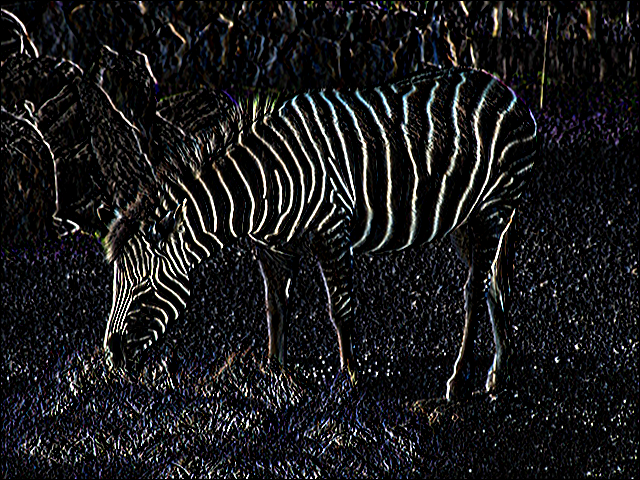

In [ ]:
filter_processing(Image.open('zebra.jpg'))

自分で色々なフィルタを設計して、どのように画像が変わるのか試してみましょう。